In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
phones= pd.read_csv('smartphones_cleaned_v6 (1).csv')

In [ ]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [ ]:
phones.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [ ]:
phones.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1          100.0          12.0   
1            5000.0                        1           33.0           6.0   
2            5000.0                        1           15.0           4.0   
3            5000.0                        1            NaN           6.0   
4            5000.0                        1           67.0           6.0   

   internal_memory  screen_size  refresh_rate  num_rear_cameras  \
0            256.0         6.70           120                 3   
1            128.0         6.59           120                 3   
2             64.0         6.60            90                 3   
3            128.0         6.55           120                 3   
4            128.0         6.70           120                 3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  resolution_width  \
0                          0            NaN              1440   
1                          1         1024.0              1080   
2                          1         1024.0              1080   
3                          1         1024.0              1080   
4                          0            NaN              1080   

   resolution_height  
0               3216  
1               2412  
2               2408  
3               2400  
4               2412

In [ ]:
phones['processor_brand'].unique()

array(['snapdragon', 'exynos', 'dimensity', 'bionic', 'helio', 'unisoc',
       'tiger', nan, 'google', 'sc9863a', 'spreadtrum', 'fusion', 'kirin',
       'mediatek'], dtype=object)

In [ ]:

phones['price_bracket'] = np.where(phones['price'] < 20000, '1. 0-20000',
                   np.where(phones['price'] < 40000, '2. 20000-40000',
                   np.where(phones['price'] < 60000, '3. 40000-60000',
                            np.where(phones['price'] < 80000, '4. 60000-80000',
                            np.where(phones['price'] < 100000, '5. 80000-100000',
                            np.where(phones['price'] < 120000, '6. 100000-120000',
                            np.where(phones['price'] < 140000, '7. 120000-140000',
                            np.where(phones['price'] < 160000, '8. 140000-160000', '9. 160000+')
                           )))))))


In [ ]:
# Identify and mark outliers
Q1 = phones['price'].quantile(0.25)
Q3 = phones['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (phones['price'] < (Q1 - 1.5 * IQR)) | (phones['price'] > (Q3 + 1.5 * IQR))

# Display rows that are considered outliers
outliers = phones[outlier_condition]
outliers['price'].sort_values(ascending=False)

#Top 2 are huge outliers and hence should be removed

phones= phones.drop(index=[427,887])



# Price distribution


(array([819., 113.,  35.,   9.,   2.,   0.,   0.,   1.]),
 array([     0,  50000, 100000, 150000, 200000, 250000, 300000, 400000,
        500000]),
 <BarContainer object of 8 artists>)

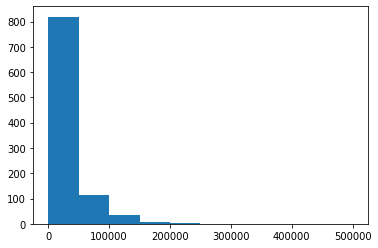

In [ ]:
plt.hist(phones['price'],bins=[0,50000,100000,150000,200000,250000,300000,400000,500000])

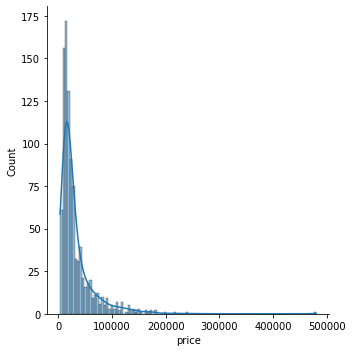

In [ ]:
sns.displot(kind='hist',data=phones,x='price',kde=True)

## Top 5 brands

<AxesSubplot:>

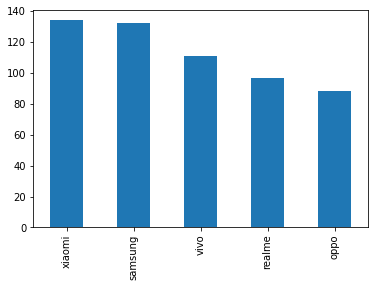

In [ ]:

phones['brand_name'].value_counts().head(5).plot(kind='bar')

<AxesSubplot:ylabel='brand_name'>

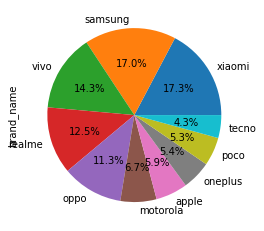

In [ ]:
phones['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [ ]:
# price
phones['price'].describe()

count       979.000000
mean      31889.779367
std       34265.231816
min        3499.000000
25%       12999.000000
50%       19990.000000
75%       35439.000000
max      480000.000000
Name: price, dtype: float64

Data has a wide range of phone prices, with a relatively high mean and standard deviation. The presence of a high maximum value and the considerable difference between the mean and median may indicate the existence of some high-priced outliers influencing the distribution.

<AxesSubplot:ylabel='price'>

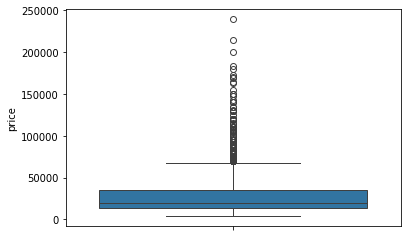

In [ ]:
sns.boxplot(phones['price'])

Maximum phones are from the budget end while all the higher ends are like outliers in the dataset

# Phones with IR Blasters:

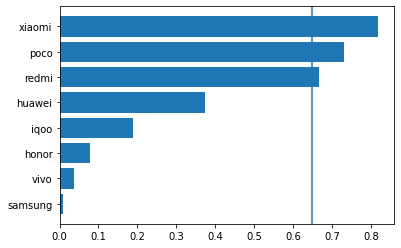

In [ ]:

a = phones.groupby('brand_name')['has_ir_blaster'].mean().sort_values(ascending=False).head(8)

plt.axvline(x=0.65)  # Corrected line
plt.barh(y=a.sort_values(ascending=True).index, width=a.sort_values(ascending=True).values)  # Corrected code for horizontal bar plot

plt.show()


Xiaomi, Poco and Redmi are the brands which have more than 65% of the phones with IR blasters.

# Comapring processors with brands

<AxesSubplot:xlabel='brand_name', ylabel='processor_brand'>

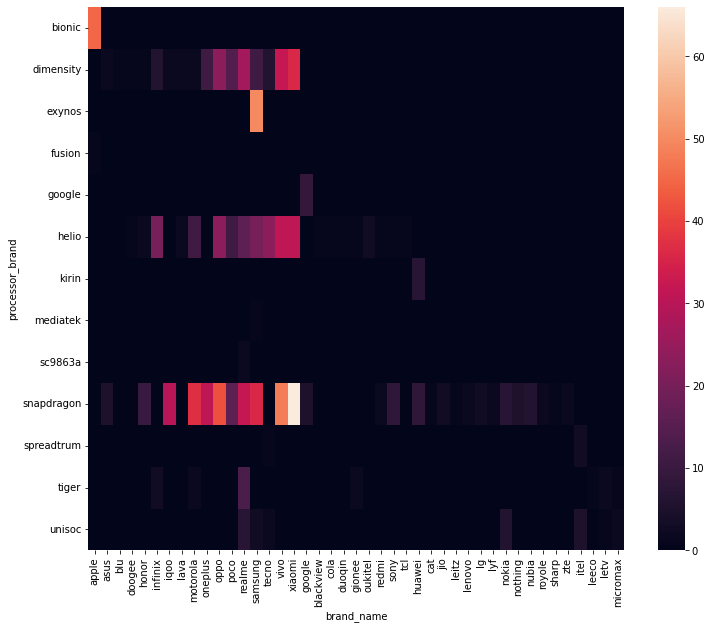

In [ ]:
import pandas as pd

result= phones.groupby(['processor_brand', 'brand_name']).size().unstack(fill_value=0)
plt.figure(figsize=(12,10))
sns.heatmap(result)


It gives an idea that snapdragon,dimensity and helio are the most preffered brands
among the top mobile brands but it is difficult to understand the share of processors for each brand

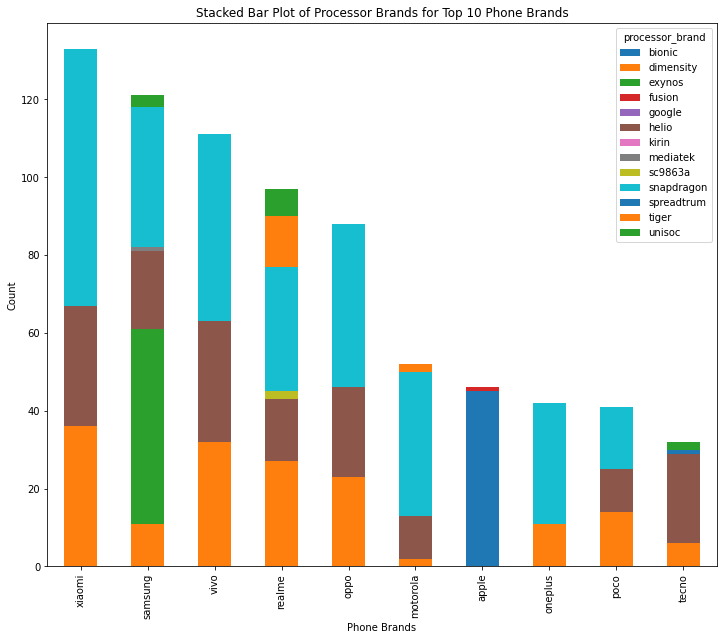

In [ ]:

top_brands = phones['brand_name'].value_counts(ascending=False).head(10).index
crosstab_result = pd.crosstab(phones['brand_name'], phones['processor_brand'])

# Selecting only the top 10 brands for the plot
crosstab_result = crosstab_result.loc[top_brands]


crosstab_result.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.title('Stacked Bar Plot of Processor Brands for Top 10 Phone Brands')
plt.xlabel('Phone Brands')
plt.ylabel('Count')
plt.show()


It is clear that except for apple which uses its own bionic chip, others are heavy users of snapdragon and dimensity.
Samsung uses its exynos in huge amounts as well.

### Screen size vs resolution

<AxesSubplot:xlabel='screen_size', ylabel='resolution_height'>

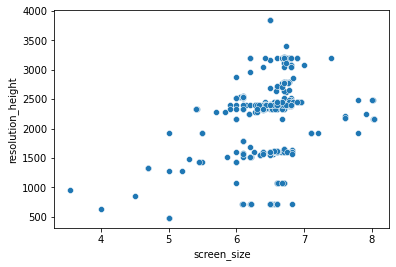

In [ ]:
sns.scatterplot(data=phones, x= 'screen_size', y= 'resolution_height')

# Comparing price with specifications

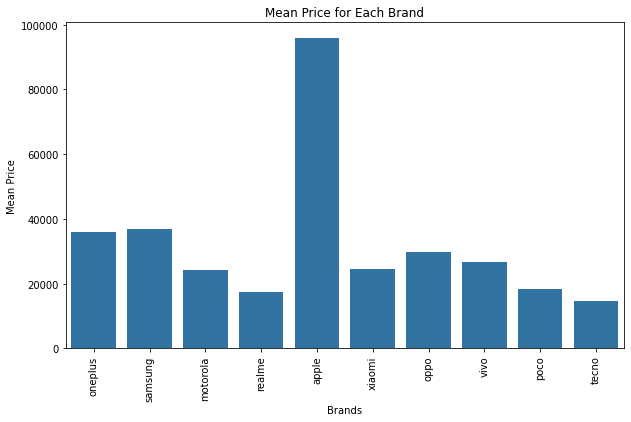

In [ ]:
data= phones[phones['brand_name'].isin(top_brands)]
plt.figure(figsize=(10, 6))
sns.barplot(x='brand_name', y='price', data=data, errorbar=None, estimator='mean')  # errorbar=None disables error bars

plt.title('Mean Price for Each Brand')
plt.xlabel('Brands')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)

plt.show()


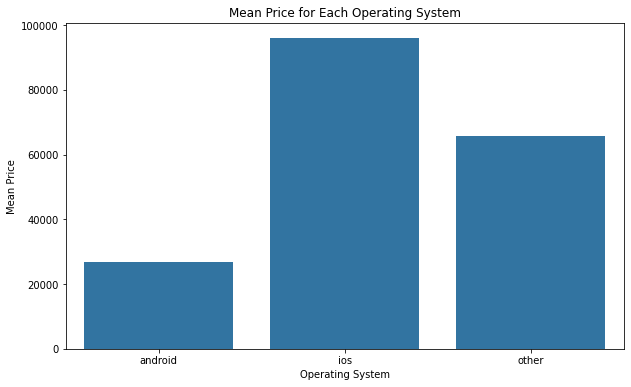

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='os', y='price', data=phones, errorbar=None, estimator='mean')

plt.title('Mean Price for Each Operating System')
plt.xlabel('Operating System')
plt.ylabel('Mean Price')

plt.show()


Mean price of apple phones is much higher than others, and hence so is the ios processor

### Price vs battery:

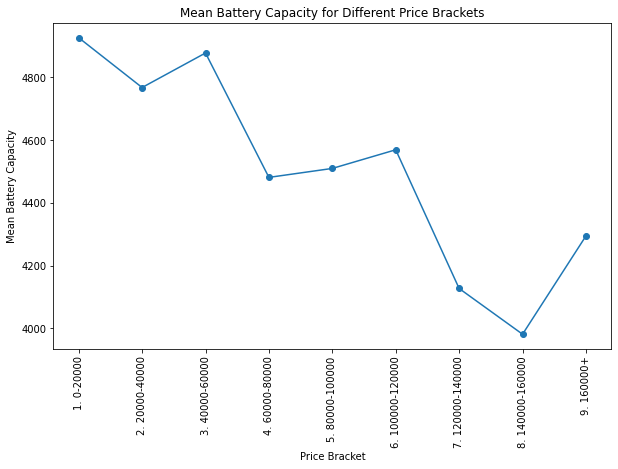

In [ ]:

a = phones.groupby('price_bracket')['battery_capacity'].mean().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(a.index, a.values, marker='o')  # Using marker for better visibility
plt.xticks(rotation=90)
plt.xlabel('Price Bracket')
plt.ylabel('Mean Battery Capacity')
plt.title('Mean Battery Capacity for Different Price Brackets')
plt.show()


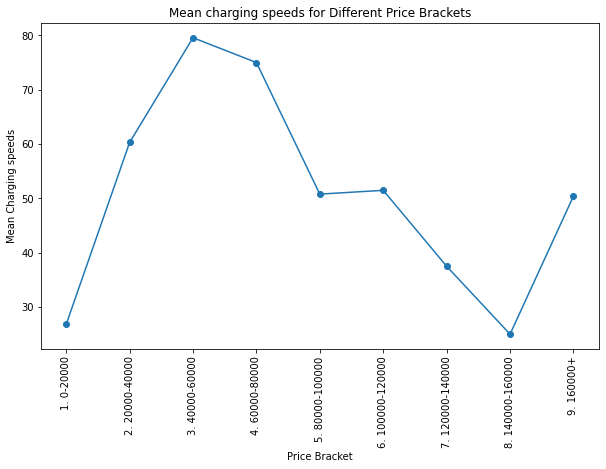

In [ ]:
a = phones.groupby('price_bracket')['fast_charging'].mean().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(a.index, a.values, marker='o')  # Using marker for better visibility
plt.xticks(rotation=90)
plt.xlabel('Price Bracket')
plt.ylabel('Mean Charging speeds')
plt.title('Mean charging speeds for Different Price Brackets')
plt.show()


Interestingly, there appears to be an inverse relationship between battery and the price, meaning the lower end phones have a higher
battery than the flagship which is likely due to weight management in the flagship phones. They seem to have replaced that factor by increasing the charging speed for phones upto 1.2 lacs after which the speed decreases as well.

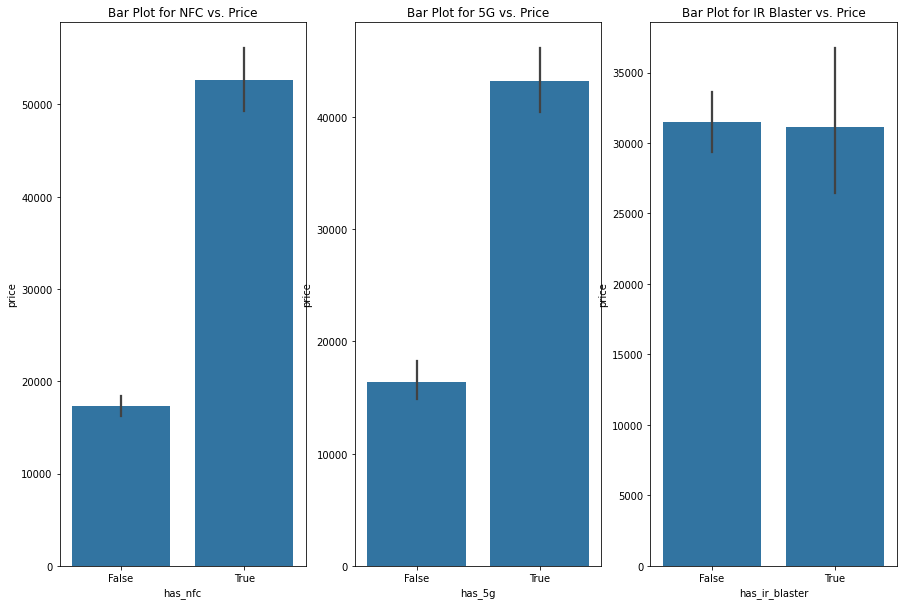

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

# Bar Plot for has_nfc vs. Price
sns.barplot(x='has_nfc', y='price', data=phones, ax=ax[0])
ax[0].set_title('Bar Plot for NFC vs. Price')

# Bar Plot for has_5g vs. Price
sns.barplot(x='has_5g', y='price', data=phones, ax=ax[1])
ax[1].set_title('Bar Plot for 5G vs. Price')

# Bar Plot for has_ir_blaster vs. Price
sns.barplot(x='has_ir_blaster', y='price', data=phones, ax=ax[2])
ax[2].set_title('Bar Plot for IR Blaster vs. Price')

plt.show()


Phones with NFC seem to be heavily priced as compared to non-NFC phones, similar to 5g providing phones(or vice versa). IR blasters don't seem to have
any effect on the price.

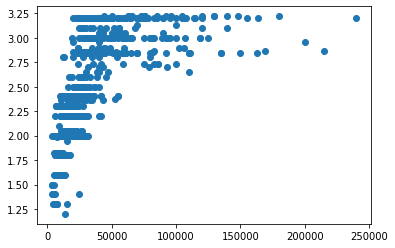

In [ ]:
plt.scatter(phones['price'],phones['processor_speed'])


Text(0.5, 0, 'resolution')

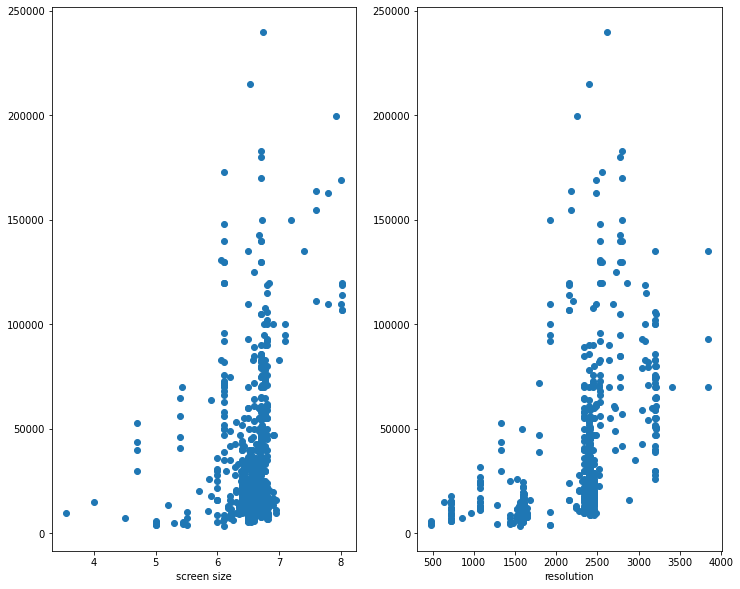

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,10))
ax[0].scatter(phones['screen_size'],phones['price'])
ax[0].set_xlabel('screen size')
ax[1].scatter(phones['resolution_height'],phones['price'])
ax[1].set_xlabel('resolution')

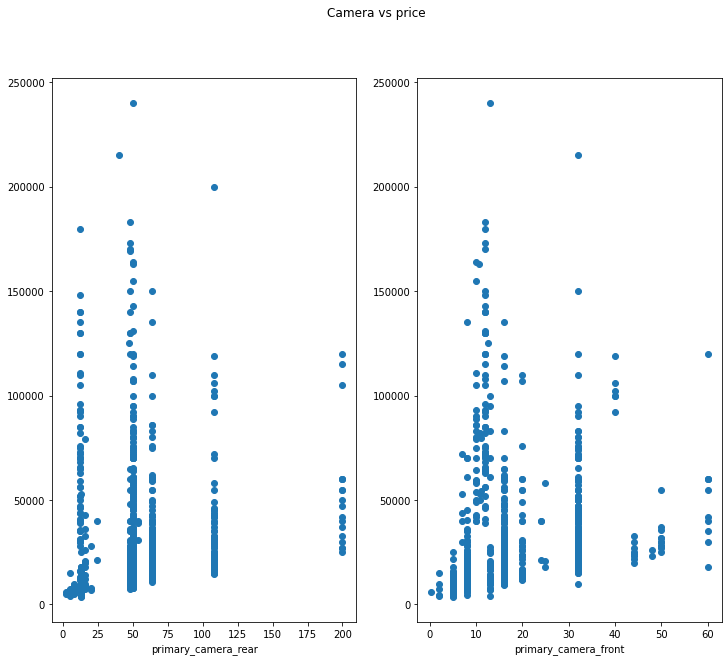

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,10))
ax[0].scatter(phones['primary_camera_rear'],phones['price'])
ax[0].set_xlabel('primary_camera_rear')
ax[1].scatter(phones['primary_camera_front'],phones['price'])
ax[1].set_xlabel('primary_camera_front')
plt.suptitle('Camera vs price')
plt.show()

From the above analysis, we can infer that the cost of a phone is directly proportional to its processor,screen size, screen resolution and the support of 5G and NFC. Battery capacity is inversely proportional, which is likely because of weight management in higher end phones, and camera quality could show no correlation to the price, as even higher end phones had a minimalistic quality, and many other factors are involved in camera quality.


# Why are Iphones so costly?

In [ ]:
iphones= phones[phones['brand_name']=='apple']
non_iphones= phones[phones['brand_name']!='apple']

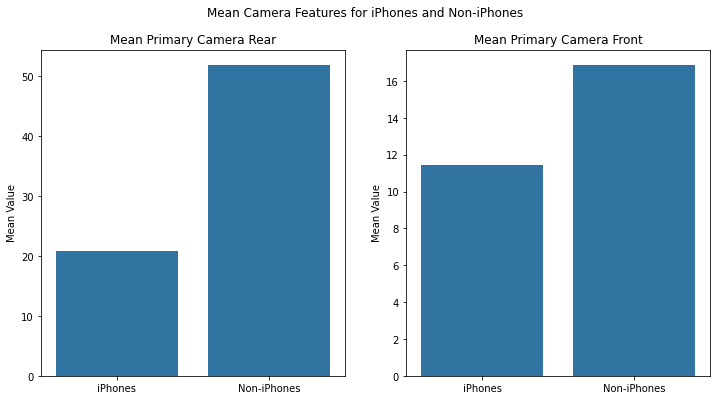

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar plot for mean primary camera rear for iPhones and non-iPhones
sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['primary_camera_rear'].mean(), non_iphones['primary_camera_rear'].mean()], ax=ax[0])
ax[0].set_title('Mean Primary Camera Rear')
ax[0].set_ylabel('Mean Value')

# Bar plot for mean primary camera front for iPhones and non-iPhones
sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['primary_camera_front'].mean(), non_iphones['primary_camera_front'].mean()], ax=ax[1])
ax[1].set_title('Mean Primary Camera Front')
ax[1].set_ylabel('Mean Value')

plt.suptitle('Mean Camera Features for iPhones and Non-iPhones')
plt.show()


Text(0, 0.5, 'Mean Value')

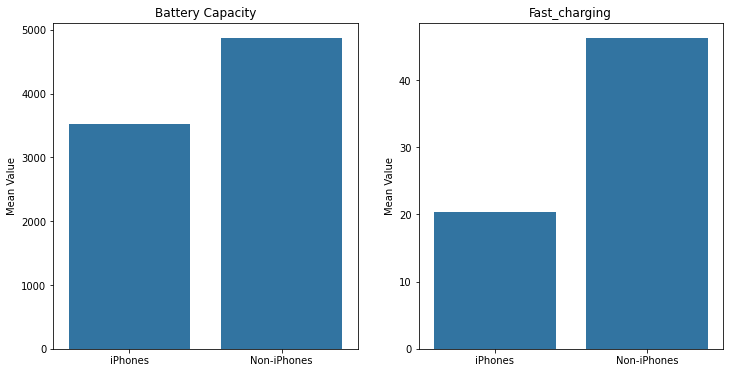

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['battery_capacity'].mean(), non_iphones['battery_capacity'].mean()], ax=ax[0])
ax[0].set_title('Battery Capacity')
ax[0].set_ylabel('Mean Value')

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['fast_charging'].mean(), non_iphones['fast_charging'].mean()], ax=ax[1])
ax[1].set_title('Fast_charging')
ax[1].set_ylabel('Mean Value')


Text(0, 0.5, 'Mean Value(GB)')

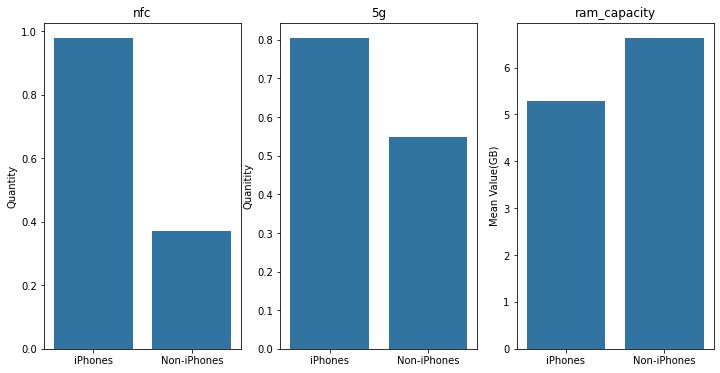

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['has_nfc'].mean(), non_iphones['has_nfc'].mean()], ax=ax[0])
ax[0].set_title('nfc')
ax[0].set_ylabel('Quantity')

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['has_5g'].mean(), non_iphones['has_5g'].mean()], ax=ax[1])
ax[1].set_title('5g')
ax[1].set_ylabel('Quanitity')

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['ram_capacity'].mean(), non_iphones['ram_capacity'].mean()], ax=ax[2])
ax[2].set_title('ram_capacity')
ax[2].set_ylabel('Mean Value(GB)')


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['refresh_rate'].mean(), non_iphones['refresh_rate'].mean()], ax=ax[0])
ax[0].set_title('refresh_rate')
ax[0].set_ylabel('Quantity')

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['screen_size'].mean(), non_iphones['screen_size'].mean()], ax=ax[1])
ax[1].set_title('screen_size')
ax[1].set_ylabel('Quanitity')

sns.barplot(x=['iPhones', 'Non-iPhones'], y=[iphones['resolution_height'].mean(), non_iphones['resolution_height'].mean()], ax=ax[2])
ax[2].set_title('resolution(MP)')
ax[2].set_ylabel('Mean Value')

Text(0, 0.5, 'Mean Value')

It can be infered that the major factors in favour of Iphones' high price is its fast charging speed,its processor,screen resolution, refresh rate, presence of 5g/nfc.
Android phones are statistically better with battery quantity and better pixel density in cameras.